In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite") # gets out of the current (Step_1) folder, then into a Resources folder 

In [5]:
# reflect an existing database into a new model
# JL Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# JL reflect the tables
# JL Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True) #automatically creates all of the base classes (tables) for our db

In [7]:
# View all of the classes that automap found
# JL Print all of the classes mapped to the Base
Base.classes.keys() # JL gives you all of the tables (classes) in our ORM db 

['measurement', 'station']

In [8]:
# Save references to each table
# Assign the measurement class to a variable called `Measurement`, and station to Station. 
Measurement = Base.classes.measurement # like an alias just a variable. can call it out with a dot operator
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Find the most recent date in the data set.
mostrecent = engine.execute('select date from measurement order by date desc').first()
mostrecent

('2017-08-23',)

In [12]:
pd.read_sql('measurement',engine)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 2017-08-23

# Calculate the date one year from the last date in data set.
twelve_months_prev = dt.date(2017, 8, 23) - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation
datesprcepslist = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > twelve_months_prev).all()
datesprcepslist

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# Save the query results as a Pandas DataFrame 
Precipdf = pd.DataFrame(datesprcepslist, columns=['date', 'precip'])
print(Precipdf)

            date  precip
0     2016-08-23    0.00
1     2016-08-24    0.08
2     2016-08-25    0.08
3     2016-08-26    0.00
4     2016-08-27    0.00
...          ...     ...
2225  2017-08-19    0.09
2226  2017-08-20     NaN
2227  2017-08-21    0.56
2228  2017-08-22    0.50
2229  2017-08-23    0.45

[2230 rows x 2 columns]


In [15]:
#and set the index to the date column
precip_df2 = pd.DataFrame(Precipdf).sort_values(by="date").set_index("date")
precip_df2

,precip
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


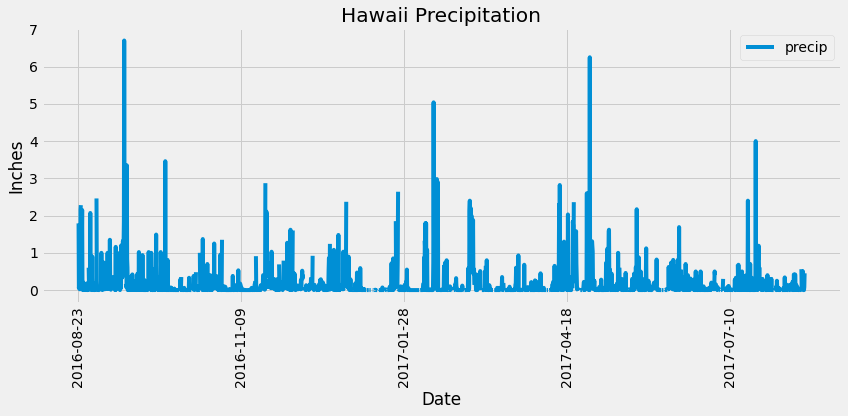

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df2.plot(rot=90, figsize=(12,6), grid=True)
plt.title("Hawaii Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("Resources/precipitation.png")
plt.show();

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df2.describe()

,precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
pd.read_sql('station',engine)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
from sqlalchemy import desc
sel = [Measurement.station, 
       func.count(Measurement.id).label('Station_Count') #, 
       # func.avg(Dow.high_price), 
       # func.avg(Dow.low_price), 
       # func.avg(Dow.close_price)
      ]

In [21]:
# List the stations and the counts in descending order.
StationCounts = session.query(*sel).group_by(Measurement.station).order_by(desc('Station_Count')).all()
StationCounts
StationCounts_df = pd.DataFrame(StationCounts, columns=["Station ID", "Observations"])
StationCounts_df

,Station ID,Observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [22]:
# Using the most active station id from the previous query (USC00519281), calculate the lowest, highest, and average temperature.
sel2 = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs) 
       ]
station_temps = session.query(*sel2).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
station_temps

StationTemps_df = pd.DataFrame(station_temps, columns=["Station ID", "MinTemp", "MaxTemp", "AvgTemp"])
StationTemps_df

,Station ID,MinTemp,MaxTemp,AvgTemp
0,USC00519281,54.0,85.0,71.663781


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel3 = [Measurement.date,Measurement.tobs]
WAIHEE_temps = session.query(*sel3).filter(Measurement.station == "USC00519281").filter(Measurement.date > '2016-08-23').all()
WAIHEE_temps
WAIHEE_temps_df = pd.DataFrame(WAIHEE_temps, columns=["Date", "Temp"])
WAIHEE_temps_df.set_index("Date")

,Temp
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


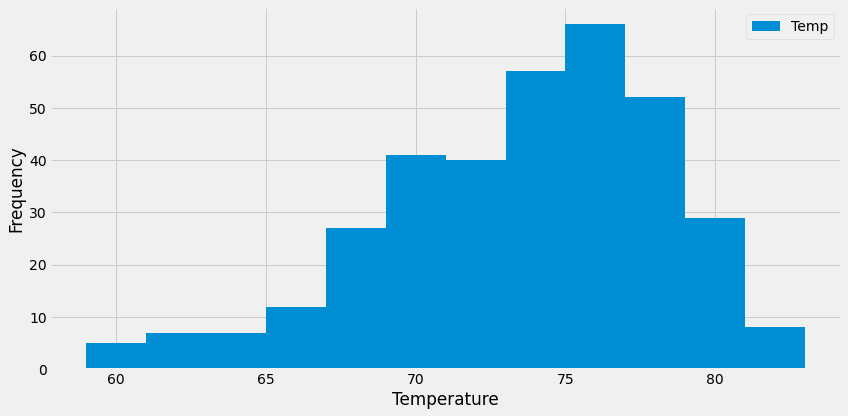

In [24]:
#plt.hist(WAIHEE_temps_df,bins = [53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86])
WAIHEE_temps_df.plot(kind="hist", figsize=(12,6), grid=True, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("Resources/station-histogram.png")
plt.show()

# Close session

In [25]:
# Close Session
session.close()